Accuracy: 96.59%


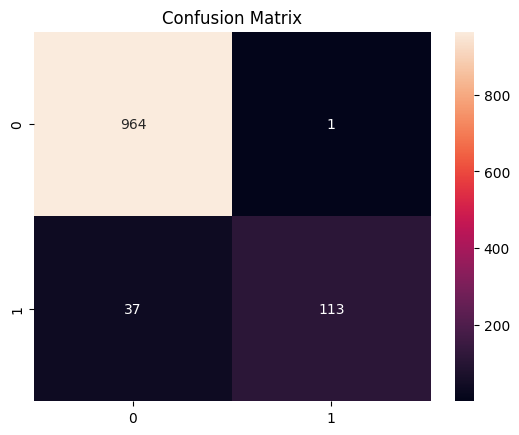

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [ ]:
# for smooth running make sure the spam.cvs file is uploaded before executing .
# Load the dataset
import pandas as pd



data = pd.read_csv('/content/spam.csv', encoding='latin-1')
# Only keep relevant columns
data = data[['v1', 'v2']]
# Rename columns
data.columns = ['label', 'text']

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)

# Model evaluation
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))